<a href="https://colab.research.google.com/github/one-2730/Generative-Model/blob/main/GM_study_week1__ch1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 1 정규분포

## 1.1 확률의 기초

### 1.1.1 확률 변수와 확률 분포

- 확률 변수: 얻을 수 있는 값이 확률적으로 결정되는 변수
- 확률 분포: 일어날 수 있는 모든 값에 대해 그 확률을 나타낸 것

**확률 분포가 되기 위한 조건**
1. 각 값의 발생 확률은 모두 0 이상 1 이하
2. 모든 확률을 다 더하면 1

### 1.1.2 확률 분포의 종류

- 이산 확률 분포: 확률 변수가 이산값을 취하는 분포
- 연속 확률 분포: 확률 변수가 연속값을 취하는 분포

**연속 확률 분포가 되기 위한 조건**
1. 모든 x에 서 확률 밀도는 0 이상
2. 전체 구간에 서 확률 밀도의 적분값은 1

### 1.1.3 기댓값과 분산

- 기댓값: 한 번의 관측으로 얻을 수 있는 값의 평균
- 분산: 기댓값을 중심으로 확률 변수의 값이 어느 정도 분산되어 있는지를 나타내는 값

## 1.2 정규 분포

### 1.2.1 정규 분포의 확률 밀도 함수

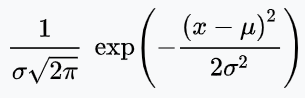

### 1.2.2. 정규 분포 코드

In [1]:
import numpy as np

def normal(x, mu=0, sigma=1):
  y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
  return y

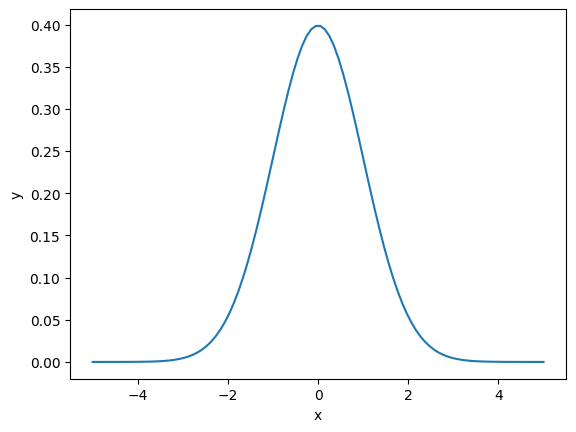

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-5 ,5, 100)
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1.2.3 매개변수의 역할

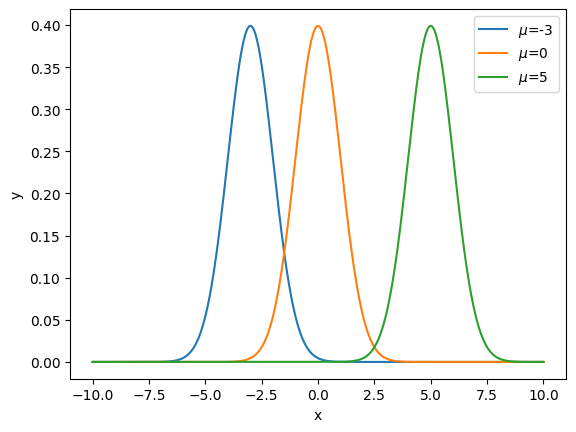

In [3]:
x = np.linspace(-10, 10, 1000)

y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label='$\mu$=-3')
plt.plot(x, y1, label='$\mu$=0')
plt.plot(x, y2, label='$\mu$=5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

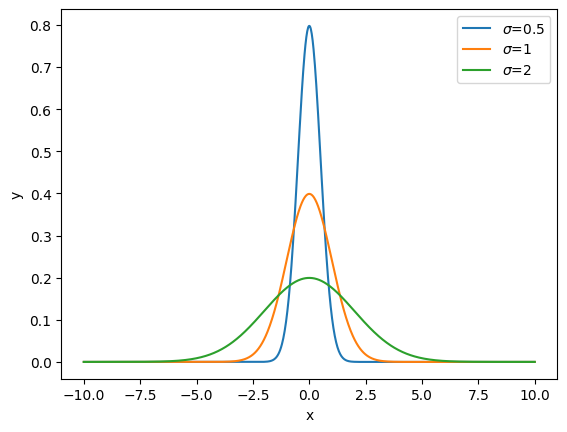

In [4]:
y0 = normal(x, mu=0, sigma=0.5)
y1 = normal(x, mu=0, sigma=1)
y2 = normal(x, mu=0, sigma=2)

plt.plot(x, y0, label='$\sigma$=0.5')
plt.plot(x, y1, label='$\sigma$=1')
plt.plot(x, y2, label='$\sigma$=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.3 중심 극한 정리

### 1.3.1 중심 극한 정리란?

**중심 극한 정리**
<br>: p(x)의 확률 분포가 무엇이든 표본 평균의 분포는 표본 크기 N이 커질 수록 정규분포에 가까워짐. 분산은 p(x)의 분산의 1/N배가 됨.

### 1.3.2 중심 극한 정리 실험

In [5]:
N = 3

xs = []
for n in range(N):
  x = np.random.rand()
  xs.append(x)

x_mean = np.mean(xs)
print(x_mean)

0.3163697838288811


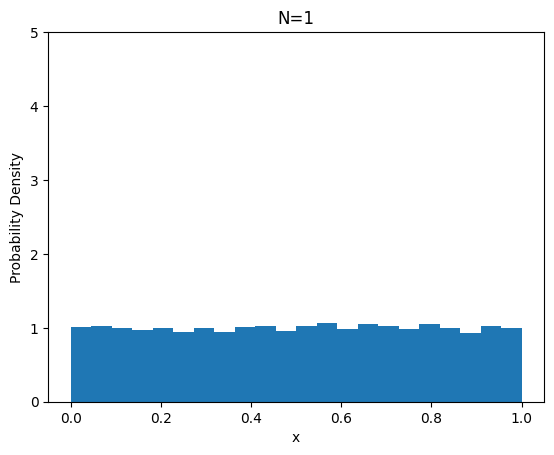

In [6]:
x_means = []
N = 1

for _ in range(10000):
  xs = []
  for n in range(N):
    x = np.random.rand()
    xs.append(x)
  mean = np.mean(xs)
  x_means.append(mean)

plt.hist(x_means, bins='auto', density=True)
plt.title(f'N={N}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 5)
plt.show()

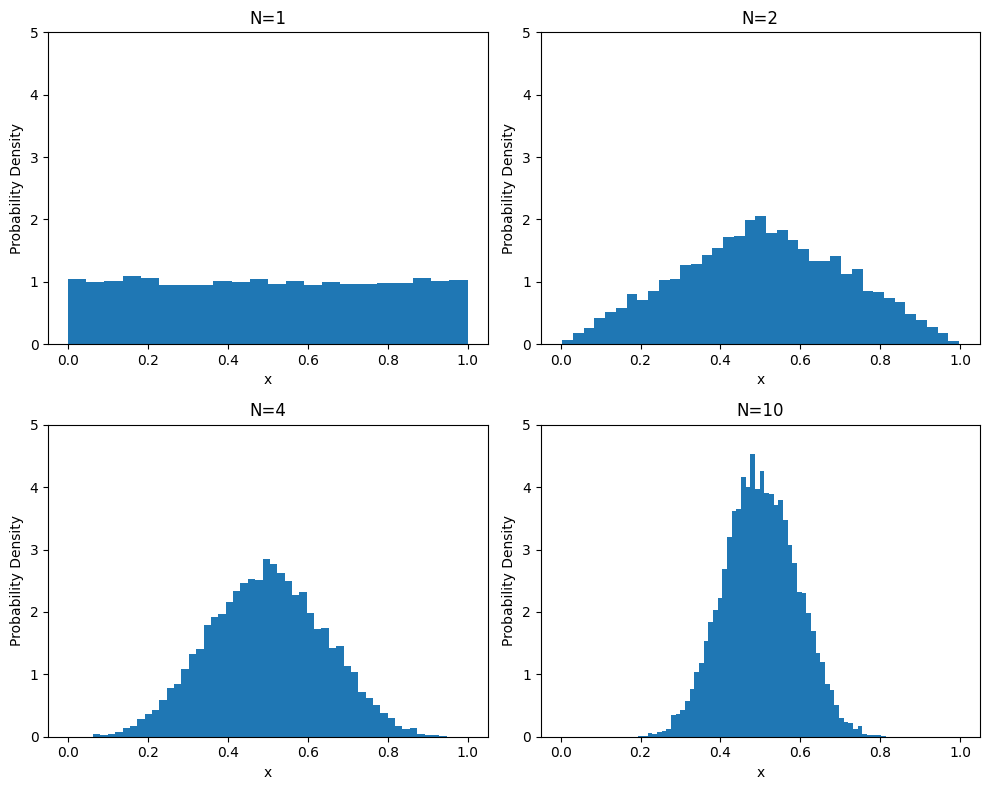

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Ns = [1, 2, 4, 10]  # N 값들
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 subplot

for idx, N in enumerate(Ns):
    x_means = []
    for _ in range(10000):
        xs = np.random.rand(N)
        mean = np.mean(xs)
        x_means.append(mean)

    ax = axes[idx // 2, idx % 2]  # subplot 위치 결정
    ax.hist(x_means, bins='auto', density=True)
    ax.set_title(f'N={N}')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')

plt.tight_layout()
plt.show()

## 1.4 표본 합의 확률 분포

### 1.4.1 표본 합의 기댓값과 분산

$E[x] = \mu$, $Var[x] = {\sigma^2}/N$ 이면 <br>
$E[Nx] = N\mu, Var[x] = N\sigma^2$

### 1.4.2 코드로 확인

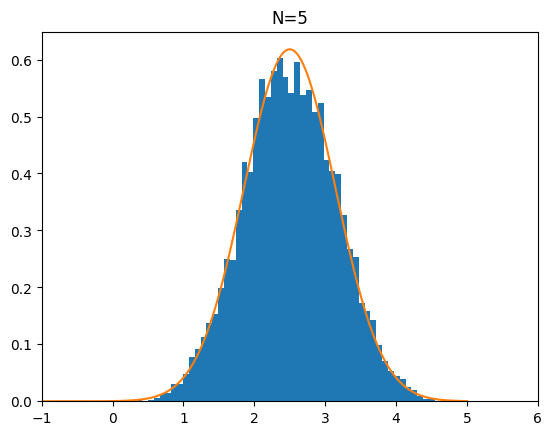

In [8]:
x_sums = []
N = 5

for _ in range(10000):
  xs = []
  for n in range(N):
    x = np.random.rand()
    xs.append(x)
  t = np.sum(xs)
  x_sums.append(t)

x_norm = np.linspace(-5, 5, 1000)
mu = N/2
sigma = np.sqrt(N/12)
y_norm = normal(x_norm, mu, sigma)

plt.hist(x_sums, bins='auto', density=True)
plt.plot(x_norm, y_norm)
plt.title(f'N={N}')
plt.xlim(-1, 6)
plt.show()

### 1.4.3 균등 분포의 평균과 분산

$X$ ~ $unif(0, 1)$ <br>
$E[x] = 1/2, Var[x] =1/12$

## 1.5 우리 주변의 정규 분포

- 측정오차
- 제품 크기
- 사람의 키 등

# CHAPTER 2 최대 가능도 추정(MLE)

## 2.1 생성 모델 개요

### 2.1.1 생성 모델의 목표

**생성 모델의 목표**
<br>: 특정 데이터 x의 확률 분포 p(x)를 모델링한 다음, 그 집단에서 선택된 것 같은 유사 데이터를 새롭게 생성하는 것.
<br> -> 매개 변수 추정 필요

### 2.1.2 모집단과 샘플

모집단: 대상 전체의 집합
<br> 생성 모델에서 모집단은 샘플을 뒷받침하는 확률 분포; 모집단 분포

샘플을 바탕으로 모집단 분포 추정
1. 모델링:모집단 분포를 '매개변수로 조정 가능한 확률 분포'로 비슷하게 표현할 수 있다고 가정
2. 매개변수 추정: 모델링 결과로 만들어 확률 분포가 샘플 데이터에 부합하도록 매개변수 추정

## 2.2 실제 데이터로 생성 모델 구현

### 2.2.1 키 데이터셋 불러오기

(25000,)


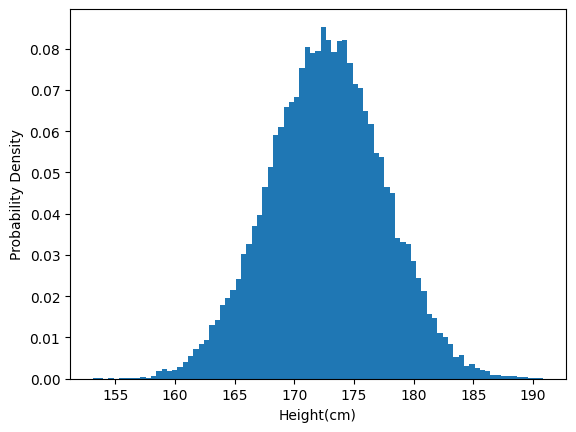

In [9]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.loadtxt('height.txt')
print(xs.shape)

plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

### 2.2.2 정규 분포를 따르는 생성 모델

1. 모델링: 키 데이터가 정규 분포라고 가정
2. 매개변수 추정: 샘플을 기반으로 정규 분포의 매개변수를 추정

In [10]:
mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

172.70250853667997
4.830167473396299


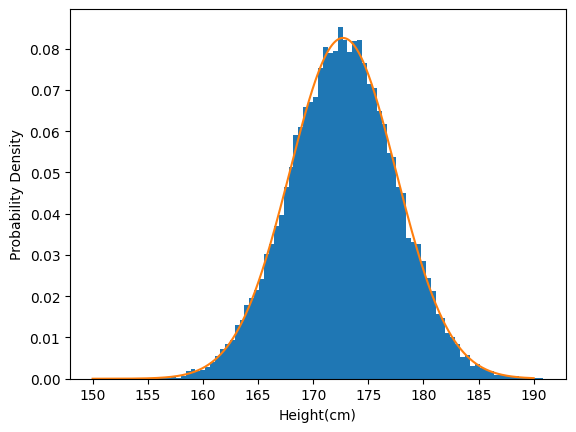

In [11]:
x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

## 2.3 최대 가능도 추정 이론

최대 우도 추정량 구하면 뮤햇은 표본평균이고 시그마햇은 표본표준편차임 걍...

## 2.4 생성 모델의 용도

1. 모델링: 키 데이터가 정규 분포라고 가정
2. 매개변수 추정: 최대 가능도 추정으로 정규 분포의 매개변수를 추정

In [12]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.loadtxt('height.txt')

mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

172.70250853667997
4.830167473396299


### 2.4.1 새로운 데이터 생성

In [13]:
np.random.normal(loc=0.0, scale=1.0, size=None)

sample = np.random.normal(mu, sigma)
print(sample)

168.57817637052142


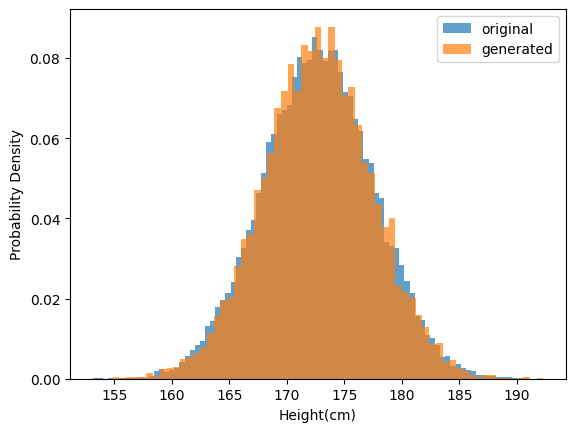

In [14]:
xs = np.loadtxt('height.txt')

mu = np.mean(xs)
sigma = np.std(xs)

mu = np.mean(xs)
sigma = np.std(xs)
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### 2.4.2 확률 계산

1. 수식을 풀어 구하기
2. 해석적으로 구하기 어려운 경우: 몬테카를로 방법

In [15]:
from scipy.stats import norm

x = 1.0
p = norm.cdf(x, loc=0, scale=1)

print(p)

0.8413447460685429


In [16]:
p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160):', p1)

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180):', 1-p2)

p(x <= 160): 0.004271406830855
p(x > 180): 0.06541774339950823


# CHAPTER 3 다변량 정규 분포

## 3.1 넘파이와 다차원 배열

### 3.1.1 다차원 배열

- 축: 원소의 배열 방향
- 차원: 축의 개수

<br>

- 스칼라: 1차원 배열 또는 0층 텐서
- 벡터: 2차원 배열 또는 1층 텐서
- 행렬: 3차원 배열 또는 2층 텐서


<br>

- 행: 가로방향
- 열: 세로방향

### 3.1.2 넘파이의 다차원 배열

In [17]:
import numpy as np

x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [18]:
W = np.array([[1, 2, 3],
             [4, 5, 6]])

print(W.ndim)
print(W.shape)

2
(2, 3)


### 3.1.3 원소별 연산

In [19]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print('---')
print(W * X) #아다마르 곱

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


### 3.1.4 벡터의 내적과 행렬 곱

In [20]:
#벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)

32


In [21]:
#행렬 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)

[[19 22]
 [43 50]]


In [22]:
print(a @ b) #np.dot(a, b)
print(A @ B) #np.dot(A, B)

32
[[19 22]
 [43 50]]


## 3.2 다변량 정규 분포

### 3.2.1 다변량 정규 분포 공식

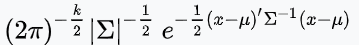

- 공분산: 일반화된 분산
- 전치: 행과 열을 바꾼 행렬
- 행렬식: 정사각 행렬의 특징을 나타내는 지표(scalar)
- 역행렬: 원래 행렬과 곱해서 단위행렬이 되는 행렬

In [23]:
#전치행렬
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


In [24]:
#행렬식
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


In [25]:
#역행렬
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)

print(B)
print('---')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


### 3.2.2 다변량 정규 분포 구현

In [26]:
def multivariate_normal(x, mu, cov):
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  D = len(x)
  z = 1/np.sqrt((2*np.pi)**D*det)
  y = z*np.exp((x-mu).T @ inv @ (x-mu) / - 2.0)
  return y

In [27]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


## 3.3 2차원 정규 분포 시각화

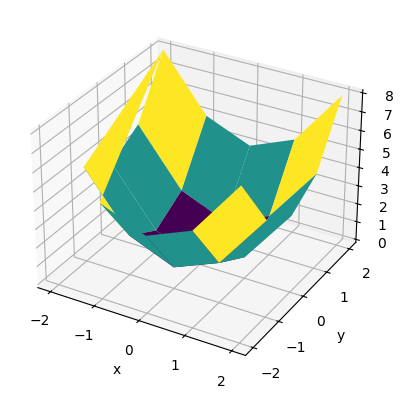

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[--2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

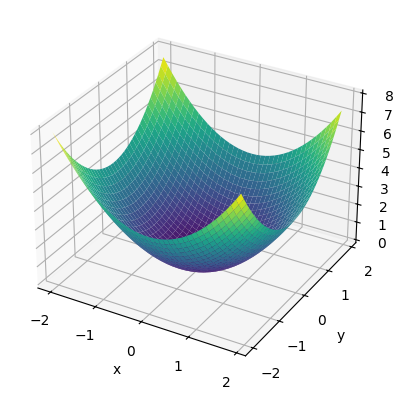

In [29]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 3.3.2 등고선 그리기

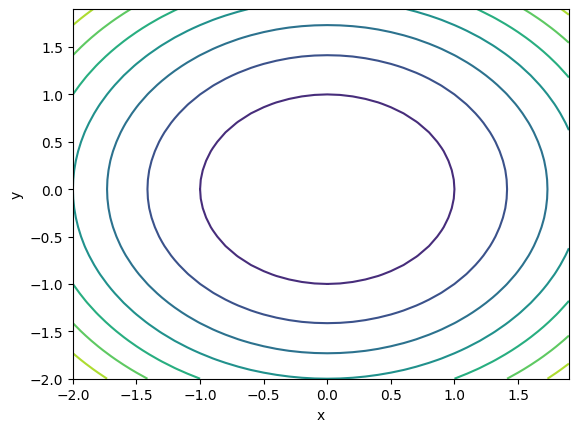

In [30]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 3.3.3 2차원 정규 분포 그래프

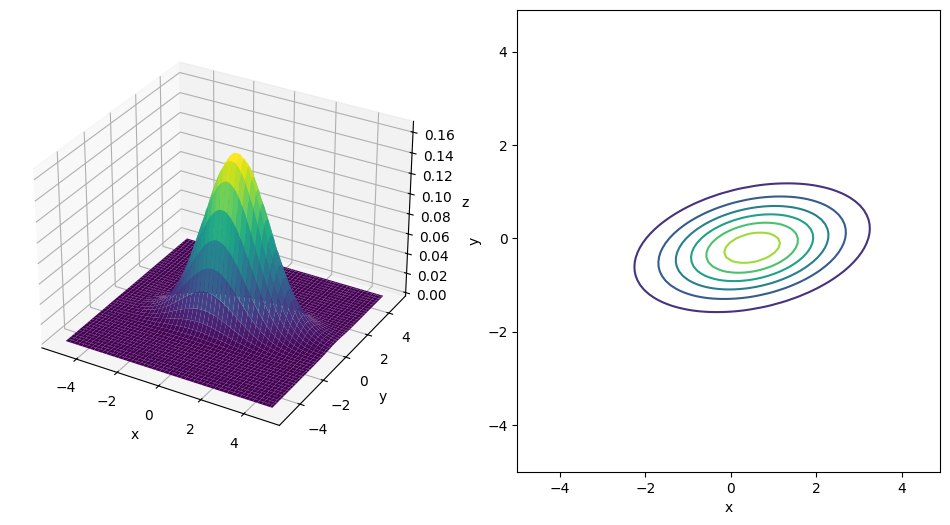

In [31]:
def multivariate_normal(x, mu, cov):
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  D = len(x)
  z = 1/np.sqrt((2*np.pi)**D*det)
  y = z*np.exp((x-mu).T @ inv @ (x-mu) / - 2.0)
  return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]])
    Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

## 3.4 다변량 정규 분포의 최대 가능도 추정

### 3.4.1 최대 가능도 추정하기

$\hat\mu = \frac{1}{N} \sum x^{(n)}$
<br>
$\hat \Sigma = \frac{1}{N} \sum (x^{(n)} - \hat\mu) (x^{(n)} - \hat\mu)^{T} $

### 3.4.2 최대 가능도 추정 구현

In [32]:
from re import M
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)

mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
  x = xs[n]
  z = x - mu
  z = z[:, np.newaxis]
  cov += z @ z.T

cov /= N

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


In [33]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


### 3.4.3 실제 데이터 사용

In [34]:
xs = np.loadtxt('height_weight.txt')

print(xs.shape)

(25000, 2)


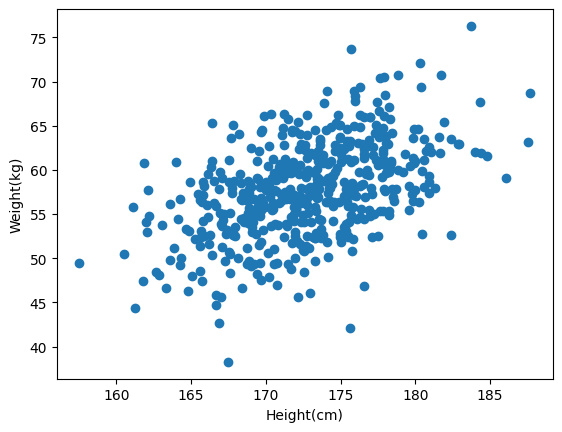

In [35]:
small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

In [36]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

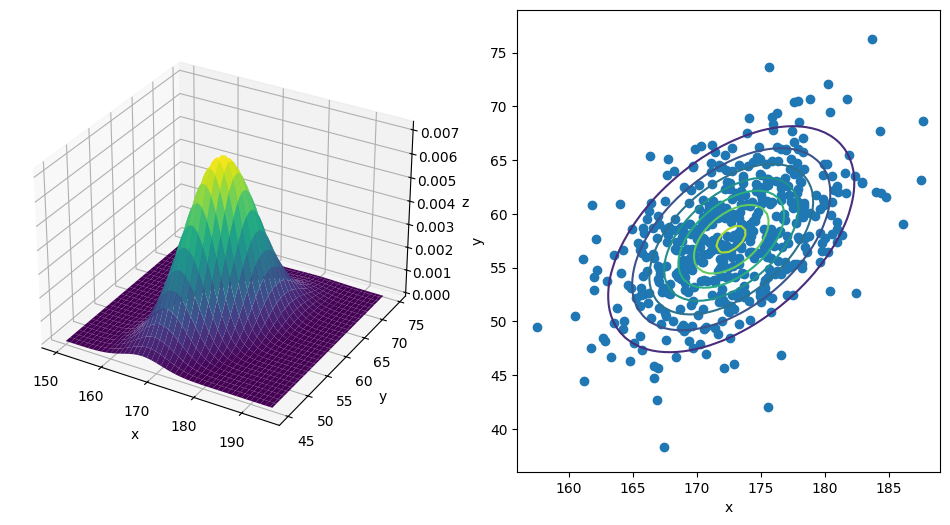

In [37]:
small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]])
    Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()